In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 로드

In [5]:
jeju_traffic = pd.read_csv("csv/jeju_traffic.csv")
jeju_traffic

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [6]:
jeju_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

### jeju_traffic EDA

## 결측치 처리

In [7]:
jeju_traffic.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [8]:
jeju_traffic.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

na / null 값이 없다.

## 이상치 처리

<AxesSubplot:ylabel='target'>

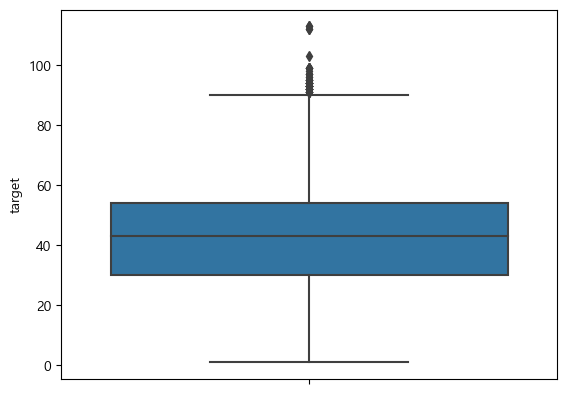

In [9]:
sns.boxplot(data = jeju_traffic, y = 'target')

In [10]:
jeju_traffic = jeju_traffic[~((jeju_traffic['target'] - jeju_traffic['target'].mean()) > 3 * jeju_traffic['target'].std())]
jeju_traffic

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


<AxesSubplot:ylabel='target'>

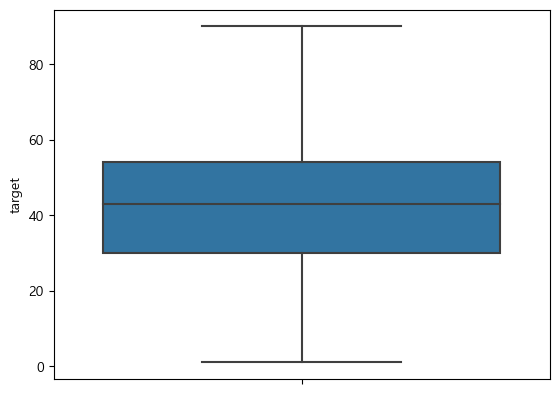

In [11]:
sns.boxplot(data = jeju_traffic, y = 'target')

# 제주 교통량 데이터와 공공데이터 병합

In [12]:
jeju_traffic.sort_values('base_date')

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2930042,TRAIN_2930042,20210901,수,22,2,103,일반국도95호선,0,0,80.0,...,0,제3고성교,33.436550,126.423971,없음,고성교차로,33.433794,126.420435,없음,73.0
616780,TRAIN_0616780,20210901,수,15,1,107,애원로,0,0,50.0,...,0,납읍교차로,33.429389,126.352388,없음,납읍리,33.445054,126.336065,없음,47.0
2107694,TRAIN_2107694,20210901,수,21,1,103,일반국도11호선,0,0,70.0,...,0,제주여중고입구사거리,33.485489,126.542504,있음,중앙여고사거리,33.487633,126.540414,있음,23.0
793239,TRAIN_0793239,20210901,수,22,2,103,일반국도12호선,0,0,70.0,...,0,신촌입구,33.529889,126.616461,없음,진드르,33.527867,126.613582,없음,42.0
3470003,TRAIN_3470003,20210901,수,2,1,107,-,0,0,50.0,...,0,농협하나로마트,33.283593,126.720591,없음,진은교차로,33.284189,126.723306,없음,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011078,TRAIN_3011078,20220731,일,7,1,107,관광단지로,0,0,30.0,...,0,선방석재개발(주),33.251003,126.412163,없음,선방석재개발(주),33.251812,126.412607,없음,42.0
3854244,TRAIN_3854244,20220731,일,16,2,103,일반국도12호선,0,0,60.0,...,0,이호동입구1,33.495269,126.459948,없음,이호해수욕장입,33.495321,126.454361,없음,30.0
601308,TRAIN_0601308,20220731,일,22,2,107,경찰로,0,0,60.0,...,0,강정동 163,33.253900,126.506693,없음,신성교회,33.253074,126.506393,없음,21.0
1981870,TRAIN_1981870,20220731,일,1,3,103,일반국도16호선,0,0,70.0,...,0,제1해안교,33.463342,126.454106,없음,해안마을,33.463090,126.452479,없음,53.0


- 날짜를 기준으로 정렬했을때, 20210901부터 20220731까지의 데이터를 포함하고 있음을 알 수 있다.

## 제주 교통량과 날씨 패턴간 상관관계 파악
- 강우량, 기온, 습도 등의 날씨 변수를 교통량 데이터와 병합하여 특정 날씨 조건이 교통량에 어떤 영향을 미치는지 분석

In [15]:
jeju_weather = pd.read_csv('csv/제주특별자치도_종관기상관측 데이터_20221130.csv')
jeju_weather

,측정 일자,정점명,정점 코드,평균기온,최저기온,최고기온,일강수량,최대풍속,최대 풍속 풍향,평균풍속,평균상대습도,최고 해면기압,최저 해면기압,평균 해면기압,합계 일사량,합계 대형증발량,합계 소형증발량
0,2000-01-01,제주,184,12.2,8.3,16.0,NaN,9.2,110.0,3.8,64.1,1024.2,1019.5,1021.7,10.4,NaN,2.4
1,2000-01-01,고산,185,12.4,7.4,17.2,NaN,10.2,140.0,4.9,62.5,1023.5,1018.4,1020.6,7.4,NaN,NaN
2,2000-01-01,성산,188,13.0,5.9,15.8,NaN,5.6,90.0,4.0,68.8,1024.9,1020.1,1022.5,NaN,NaN,NaN
3,2000-01-01,서귀포,189,13.5,10.2,17.3,NaN,6.4,90.0,3.3,62.6,1023.9,1019.0,1021.2,NaN,1.5,2.9
4,2000-01-02,제주,184,10.8,7.5,17.2,0.0,10.0,290.0,4.3,66.3,1020.6,1016.4,1018.3,2.6,NaN,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32939,2022-07-18,서귀포,189,27.0,25.4,28.7,10.6,5.5,230.0,2.6,98.1,1002.3,998.7,1000.1,NaN,NaN,NaN
32940,2022-07-19,제주,184,27.8,25.2,30.8,3.3,6.4,270.0,3.4,79.4,1008.0,1000.5,1004.9,26.3,5.2,7.4
32941,2022-07-19,고산,185,26.1,24.1,28.9,0.4,12.4,270.0,5.8,92.5,1007.8,1000.5,1004.6,25.5,4.3,6.2
32942,2022-07-19,성산,188,26.8,23.3,30.6,8.8,5.9,290.0,2.6,79.4,1007.7,1000.2,1004.3,NaN,NaN,NaN


In [16]:
jeju_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32944 entries, 0 to 32943
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정 일자      32944 non-null  object 
 1   정점명        32944 non-null  object 
 2   정점 코드      32944 non-null  int64  
 3   평균기온       32940 non-null  float64
 4   최저기온       32944 non-null  float64
 5   최고기온       32944 non-null  float64
 6   일강수량       14374 non-null  float64
 7   최대풍속       32922 non-null  float64
 8   최대 풍속 풍향   32921 non-null  float64
 9   평균풍속       32917 non-null  float64
 10  평균상대습도     32940 non-null  float64
 11  최고 해면기압    32941 non-null  float64
 12  최저 해면기압    32943 non-null  float64
 13  평균 해면기압    32939 non-null  float64
 14  합계 일사량     16452 non-null  float64
 15  합계 대형증발량   12758 non-null  float64
 16  합계 소형증발량   15962 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 4.3+ MB


## 병합할 공공데이터 EDA

In [17]:
# na값 확인

jeju_weather.isna().sum()

측정 일자            0
정점명              0
정점 코드            0
평균기온             4
최저기온             0
최고기온             0
일강수량         18570
최대풍속            22
최대 풍속 풍향        23
평균풍속            27
평균상대습도           4
최고 해면기압          3
최저 해면기압          1
평균 해면기압          5
합계 일사량       16492
합계 대형증발량     20186
합계 소형증발량     16982
dtype: int64

In [18]:
# na값 대체하여 제거

jeju_weather['평균기온'] = jeju_weather['평균기온'].fillna(jeju_weather['평균기온'].mean())
jeju_weather['일강수량'] = jeju_weather['일강수량'].fillna(jeju_weather['일강수량'].mean())
jeju_weather['최대풍속'] = jeju_weather['최대풍속'].fillna(jeju_weather['최대풍속'].mean())
jeju_weather['최대 풍속 풍향'] = jeju_weather['최대 풍속 풍향'].fillna(jeju_weather['최대 풍속 풍향'].mean())
jeju_weather['평균풍속'] = jeju_weather['평균풍속'].fillna(jeju_weather['평균풍속'].mean())
jeju_weather['평균상대습도'] = jeju_weather['평균상대습도'].fillna(jeju_weather['평균상대습도'].mean())
jeju_weather['최고 해면기압'] = jeju_weather['최고 해면기압'].fillna(jeju_weather['최고 해면기압'].mean())
jeju_weather['최저 해면기압'] = jeju_weather['최저 해면기압'].fillna(jeju_weather['최저 해면기압'].mean())
jeju_weather['평균 해면기압'] = jeju_weather['평균 해면기압'].fillna(jeju_weather['평균 해면기압'].mean())
jeju_weather['합계 일사량'] = jeju_weather['합계 일사량'].fillna(jeju_weather['합계 일사량'].mean())
jeju_weather['합계 대형증발량'] = jeju_weather['합계 대형증발량'].fillna(jeju_weather['합계 대형증발량'].mean())
jeju_weather['합계 소형증발량 '] = jeju_weather['합계 소형증발량 '].fillna(jeju_weather['합계 소형증발량 '].mean())

jeju_weather.isna().sum()

측정 일자        0
정점명          0
정점 코드        0
평균기온         0
최저기온         0
최고기온         0
일강수량         0
최대풍속         0
최대 풍속 풍향     0
평균풍속         0
평균상대습도       0
최고 해면기압      0
최저 해면기압      0
평균 해면기압      0
합계 일사량       0
합계 대형증발량     0
합계 소형증발량     0
dtype: int64

In [19]:
# 날짜 형식 재설정

jeju_weather['측정 일자'] = pd.to_datetime(jeju_weather['측정 일자'])
jeju_weather['날짜'] = jeju_weather['측정 일자'].dt.strftime('%Y%m%d').astype(int)
jeju_weather = jeju_weather.drop('측정 일자', axis=1)

jeju_weather

,정점명,정점 코드,평균기온,최저기온,최고기온,일강수량,최대풍속,최대 풍속 풍향,평균풍속,평균상대습도,최고 해면기압,최저 해면기압,평균 해면기압,합계 일사량,합계 대형증발량,합계 소형증발량,날짜
0,제주,184,12.2,8.3,16.0,10.509928,9.2,110.0,3.8,64.1,1024.2,1019.5,1021.7,10.400000,2.631016,2.400000,20000101
1,고산,185,12.4,7.4,17.2,10.509928,10.2,140.0,4.9,62.5,1023.5,1018.4,1020.6,7.400000,2.631016,3.473725,20000101
2,성산,188,13.0,5.9,15.8,10.509928,5.6,90.0,4.0,68.8,1024.9,1020.1,1022.5,13.419098,2.631016,3.473725,20000101
3,서귀포,189,13.5,10.2,17.3,10.509928,6.4,90.0,3.3,62.6,1023.9,1019.0,1021.2,13.419098,1.500000,2.900000,20000101
4,제주,184,10.8,7.5,17.2,0.000000,10.0,290.0,4.3,66.3,1020.6,1016.4,1018.3,2.600000,2.631016,1.900000,20000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32939,서귀포,189,27.0,25.4,28.7,10.600000,5.5,230.0,2.6,98.1,1002.3,998.7,1000.1,13.419098,2.631016,3.473725,20220718
32940,제주,184,27.8,25.2,30.8,3.300000,6.4,270.0,3.4,79.4,1008.0,1000.5,1004.9,26.300000,5.200000,7.400000,20220719
32941,고산,185,26.1,24.1,28.9,0.400000,12.4,270.0,5.8,92.5,1007.8,1000.5,1004.6,25.500000,4.300000,6.200000,20220719
32942,성산,188,26.8,23.3,30.6,8.800000,5.9,290.0,2.6,79.4,1007.7,1000.2,1004.3,13.419098,2.631016,3.473725,20220719


<AxesSubplot:ylabel='평균상대습도'>

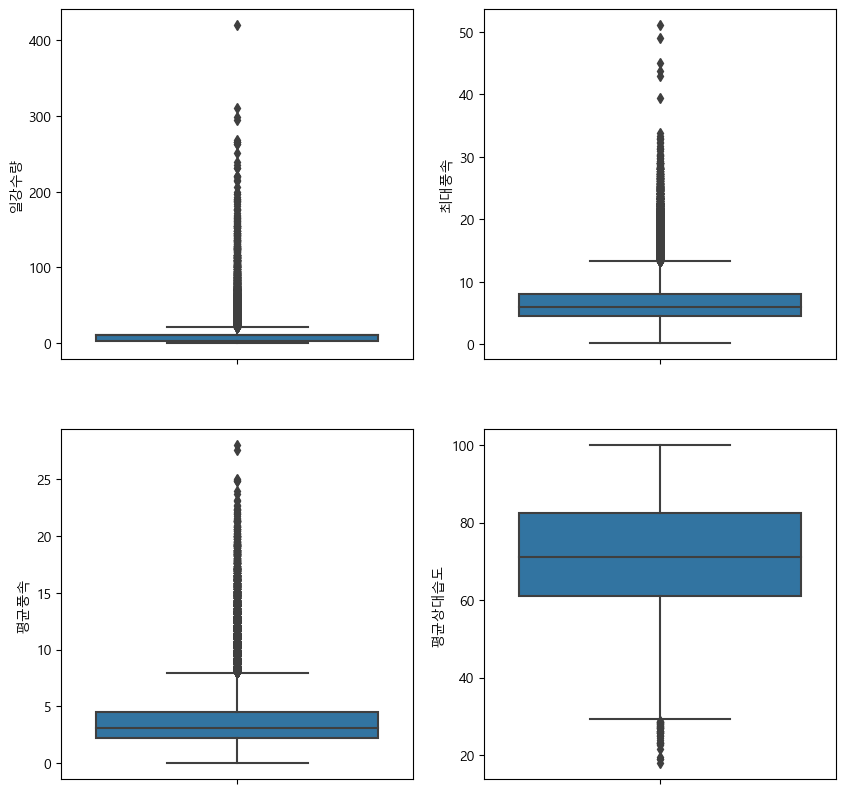

In [21]:
# 이상치 확인
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.boxplot(data = jeju_weather, y = '일강수량', ax=ax[0][0])
sns.boxplot(data = jeju_weather, y = '최대풍속', ax=ax[0][1])
sns.boxplot(data = jeju_weather, y = '평균풍속', ax=ax[1][0])
sns.boxplot(data = jeju_weather, y = '평균상대습도', ax=ax[1][1])

<AxesSubplot:ylabel='합계 소형증발량 '>

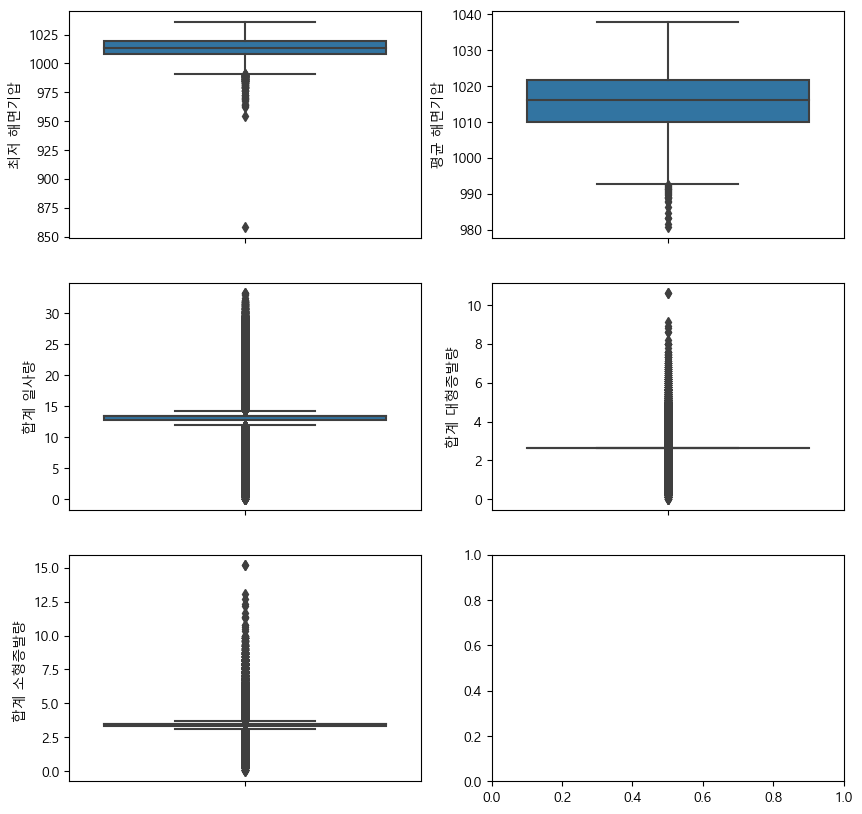

In [22]:
# 이상치 확인
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.boxplot(data = jeju_weather, y = '최저 해면기압', ax=ax[0][0])
sns.boxplot(data = jeju_weather, y = '평균 해면기압', ax=ax[0][1])
sns.boxplot(data = jeju_weather, y = '합계 일사량', ax=ax[1][0])
sns.boxplot(data = jeju_weather, y = '합계 대형증발량', ax=ax[1][1])
sns.boxplot(data = jeju_weather, y = '합계 소형증발량 ', ax=ax[2][0])

In [24]:
# 이상치 제거
jeju_weather = jeju_weather[~((jeju_weather['일강수량'] - jeju_weather['일강수량'].mean()) > 3 * jeju_weather['일강수량'].std())]
jeju_weather = jeju_weather[~((jeju_weather['최대풍속'] - jeju_weather['최대풍속'].mean()) > 3 * jeju_weather['최대풍속'].std())]
jeju_weather = jeju_weather[~((jeju_weather['평균풍속'] - jeju_weather['평균풍속'].mean()) > 3 * jeju_weather['평균풍속'].std())]
jeju_weather = jeju_weather[~((jeju_weather['평균상대습도'] - jeju_weather['평균상대습도'].mean()) > 3 * jeju_weather['평균상대습도'].std())]
jeju_weather = jeju_weather[~((jeju_weather['최저 해면기압'] - jeju_weather['최저 해면기압'].mean()) > 3 * jeju_weather['최저 해면기압'].std())]
jeju_weather = jeju_weather[~((jeju_weather['평균 해면기압'] - jeju_weather['평균 해면기압'].mean()) > 3 * jeju_weather['평균 해면기압'].std())]
jeju_weather = jeju_weather[~((jeju_weather['합계 일사량'] - jeju_weather['합계 일사량'].mean()) > 3 * jeju_weather['합계 일사량'].std())]
jeju_weather = jeju_weather[~((jeju_weather['합계 대형증발량'] - jeju_weather['합계 대형증발량'].mean()) > 3 * jeju_weather['합계 대형증발량'].std())]
jeju_weather = jeju_weather[~((jeju_weather['합계 소형증발량 '] - jeju_weather['합계 소형증발량 '].mean()) > 3 * jeju_weather['합계 소형증발량 '].std())]

jeju_weather

,정점명,정점 코드,평균기온,최저기온,최고기온,일강수량,최대풍속,최대 풍속 풍향,평균풍속,평균상대습도,최고 해면기압,최저 해면기압,평균 해면기압,합계 일사량,합계 대형증발량,합계 소형증발량,날짜
0,제주,184,12.2,8.3,16.0,10.509928,9.2,110.0,3.8,64.1,1024.2,1019.5,1021.7,10.400000,2.631016,2.400000,20000101
1,고산,185,12.4,7.4,17.2,10.509928,10.2,140.0,4.9,62.5,1023.5,1018.4,1020.6,7.400000,2.631016,3.473725,20000101
2,성산,188,13.0,5.9,15.8,10.509928,5.6,90.0,4.0,68.8,1024.9,1020.1,1022.5,13.419098,2.631016,3.473725,20000101
3,서귀포,189,13.5,10.2,17.3,10.509928,6.4,90.0,3.3,62.6,1023.9,1019.0,1021.2,13.419098,1.500000,2.900000,20000101
4,제주,184,10.8,7.5,17.2,0.000000,10.0,290.0,4.3,66.3,1020.6,1016.4,1018.3,2.600000,2.631016,1.900000,20000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32938,성산,188,27.5,24.8,28.9,9.700000,8.0,230.0,4.7,92.8,1001.9,998.4,999.8,13.419098,2.631016,3.473725,20220718
32939,서귀포,189,27.0,25.4,28.7,10.600000,5.5,230.0,2.6,98.1,1002.3,998.7,1000.1,13.419098,2.631016,3.473725,20220718
32941,고산,185,26.1,24.1,28.9,0.400000,12.4,270.0,5.8,92.5,1007.8,1000.5,1004.6,25.500000,4.300000,6.200000,20220719
32942,성산,188,26.8,23.3,30.6,8.800000,5.9,290.0,2.6,79.4,1007.7,1000.2,1004.3,13.419098,2.631016,3.473725,20220719


## 데이터 병합

In [25]:
jeju_merged = pd.merge(jeju_traffic, jeju_weather, left_on='base_date', right_on='날짜', how='inner')
jeju_merged

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,최대 풍속 풍향,평균풍속,평균상대습도,최고 해면기압,최저 해면기압,평균 해면기압,합계 일사량,합계 대형증발량,합계 소형증발량,날짜
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,180.0,7.5,98.0,1008.0,1002.0,1004.9,14.900000,2.000000,2.800000,20220623
1,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,230.0,5.3,93.9,1008.3,1002.8,1005.1,13.419098,2.631016,3.473725,20220623
2,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,230.0,1.9,98.6,1008.7,1003.6,1005.9,13.419098,2.631016,3.473725,20220623
3,TRAIN_0000010,20220623,목,11,1,103,일반국도99호선,0,0,60.0,...,180.0,7.5,98.0,1008.0,1002.0,1004.9,14.900000,2.000000,2.800000,20220623
4,TRAIN_0000010,20220623,목,11,1,103,일반국도99호선,0,0,60.0,...,230.0,5.3,93.9,1008.3,1002.8,1005.1,13.419098,2.631016,3.473725,20220623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200580,TRAIN_4695694,20220315,화,1,2,107,수영장길,0,0,60.0,...,230.0,1.3,73.0,1016.0,1012.5,1014.3,13.419098,2.631016,3.473725,20220315
16200581,TRAIN_4696265,20220315,화,2,2,103,일반국도12호선,0,0,60.0,...,50.0,2.3,79.8,1017.6,1013.4,1015.2,22.600000,2.900000,4.100000,20220315
16200582,TRAIN_4696265,20220315,화,2,2,103,일반국도12호선,0,0,60.0,...,360.0,5.0,90.3,1016.3,1012.7,1014.7,21.900000,2.300000,3.300000,20220315
16200583,TRAIN_4696265,20220315,화,2,2,103,일반국도12호선,0,0,60.0,...,290.0,2.7,63.8,1015.9,1012.7,1014.2,13.419098,2.631016,3.473725,20220315


In [26]:
jeju_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200585 entries, 0 to 16200584
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target          

# 병합된 데이터 시각화하기

## 기상 요소별 평균 속도와의 관계

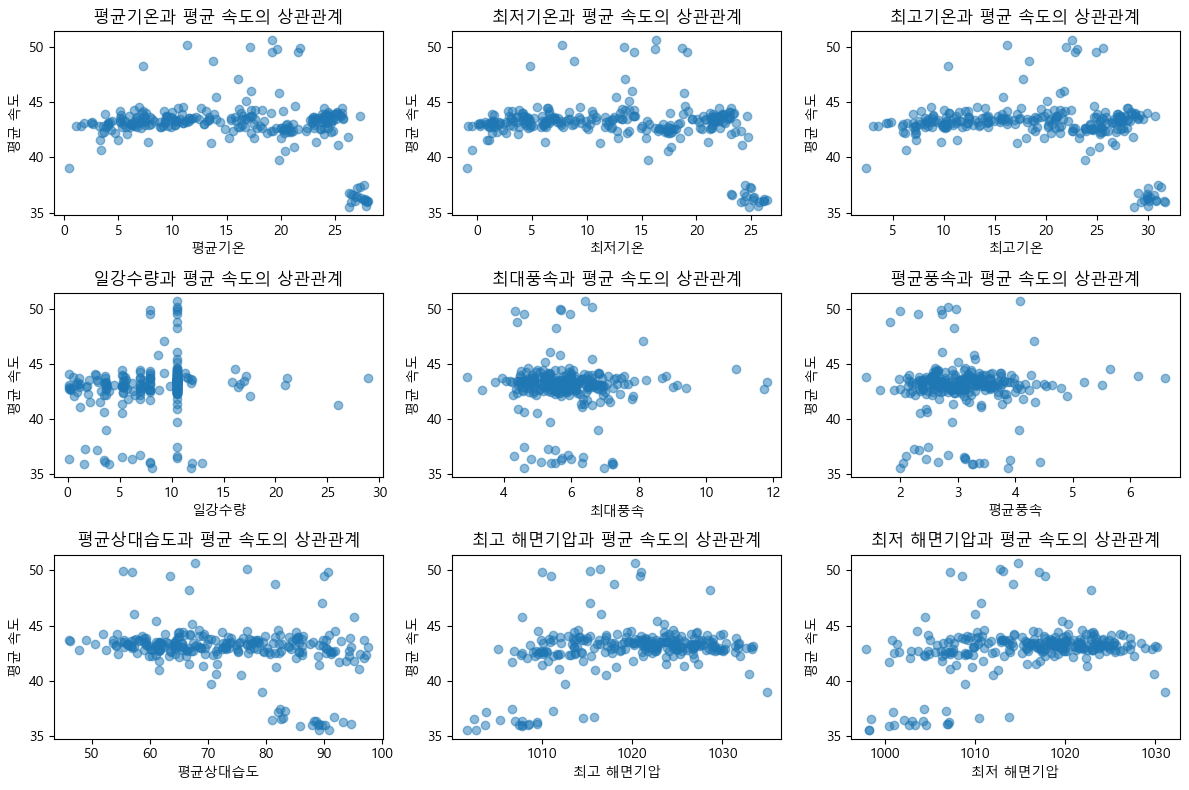

In [27]:
weather_columns = ['평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속', '평균상대습도', '최고 해면기압', '최저 해면기압']
weather_traffic = jeju_merged.groupby('base_date')[weather_columns + ['target']].mean()

plt.figure(figsize=(12, 8))
for i, column in enumerate(weather_columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(weather_traffic[column], weather_traffic['target'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('평균 속도')
    plt.title(f'{column}과 평균 속도의 상관관계')

plt.tight_layout()
plt.show()


일강수량과 평균 속도의 상관관계
- 일강수량과 평균 속도 간에는 음의 상관관계가 있는 것으로 보인다. 일강수량이 높을수록 상대적으로 낮은 평균 속도와 연관될 수 있다. 
- 데이터 포인트가 강수량이 적은날에 집중되어 있는 것을 보면 일강수량이 높은 날에 교통량이 현저히 적다는 것을 알 수 있다.

## 도로 유형별 평균 속도, 도로 유형별 평균 기온의 관계

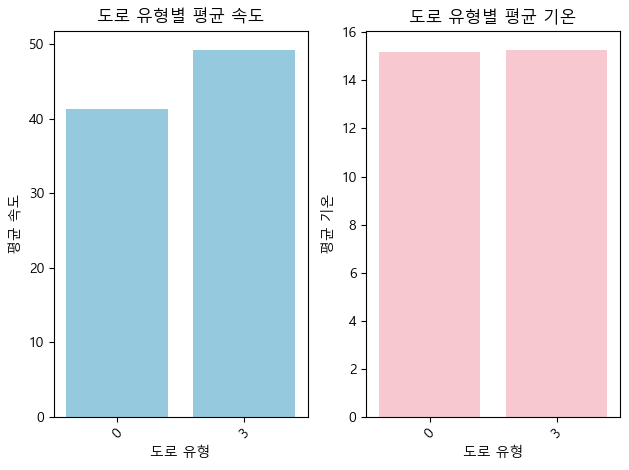

In [28]:
# 도로 유형별 평균 속도와 평균 기온 추출
road_type_speed_temp = jeju_merged.groupby('road_type')[['target', '평균기온']].mean()

# 첫 번째 그래프: 도로 유형별 평균 속도
plt.subplot(1, 2, 1)
sns.barplot(x=road_type_speed_temp.index, y=road_type_speed_temp['target'], color='skyblue')
plt.xlabel('도로 유형')
plt.ylabel('평균 속도')
plt.title('도로 유형별 평균 속도')
plt.xticks(rotation=45)

# 두 번째 그래프: 도로 유형별 평균 기온
plt.subplot(1, 2, 2)
sns.barplot(x=road_type_speed_temp.index, y=road_type_speed_temp['평균기온'], color='pink')
plt.xlabel('도로 유형')
plt.ylabel('평균 기온')
plt.title('도로 유형별 평균 기온')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 도로 유형별 평균 속도

- 각 도로 유형마다 평균 속도에 차이가 있음을 확인할 수 있다. 도로 유형 0과 3은 비슷한 평균 속도를 가지고 있으며, 도로 유형 0은 가장 낮은 평균 속도를 보여준다. 

- 이를 통해 도로 유형이 평균 속도에 영향을 미치는 것으로 추측할 수 있다.

#### 도로 유형별 평균 기온

- 도로 유형별로 평균 기온에 큰 차이가 없음을 확인할 수 있다. 각 도로 유형에서 평균 기온이 비슷한 범위에 분포하고 있다.

- 도로 유형별로 평균 속도에 차이가 나타나는 것으로 보아, 도로 유형이 평균 속도에 영향을 미치는 요인이 될 수 있음을 알 수 있다. 

- 이를 통해 도로 유형이 교통 속도에 영향을 미칠 수 있다는 인사이트를 얻을 수 있으며, 이를 활용하여 도로 유형별 교통 현황을 이해하고, 교통 정책 및 개선 방안을 수립할 수 있다.

- 평균 기온은 도로 유형별로 큰 차이를 보이지 않으므로, 평균 기온이 평균 속도에 직접적인 영향을 주는 요인은 아닐 수 있다.